# Pipeline to analyze data from methylome

## Data from *Arabidopsis*

# Condensed code

In [85]:
# Importing libraries
import os
import pandas 
import numpy 
%matplotlib notebook
import matplotlib.pyplot 
matplotlib.style.use('ggplot')
import sys
sys.path.insert(0, '/Users/luciehuyghe/Desktop/Pipeline/scripts') #needed to be able to import a script in another folder.
#Here my methyl script with the graph functions is not in the same folder as my python general script.
import methyl as m

In [86]:
#Defining parameters
nbchr = 5 #numbre of chromosoms
numchr = 'all' #chromosome(s) we want to study : either a number [x], a serie of numbers [x,y] or 'all'
nrows = 2000000#number of rows to read or 'all' if you wish to read the entire file
nbecotype= 60 #number of ecotypes
window= 1000 #size of the window in basepair
max_size=40000000 #size of the longest chromosome
min_size =0 # 0 if we want all the chromosome, other if you want a specific portion : position start
list_ecotypes=os.path.join('ecotypes_list.txt') #list of the ecotypes that will be used. Put the ref FIRST
path_to_file = '/Users/luciehuyghe/Desktop/Pipeline/Eckers_data/Methylome'

In [87]:
imp=open(list_ecotypes, 'r')
list_ecotype=[]
names=[]
for line in imp:
    for i in line.split():
        list_ecotype.append(i)
        names.append(i[20:-4])
imp.close()
for i in range (1, nbchr+1):
    exec('methylome_file%d = []' % (i))
    exec('onlymethyl%d = []' % (i))
    exec('CGs%d = []' % (i))
    exec('CHGs%d = []' % (i))
    exec('CHHs%d = []' % (i))
    
if nbecotype == 'all':
    print('No number of ecotype specified, reading all the ecotypes')
    if nrows == 'all' :
        print('No number of rows specified, reading all the file')
        for i in range (len(list_ecotype)) :    
            methylome_files=(pandas.read_csv(os.path.join(path_to_files, list_ecotype[i]), sep='\t'))
            if numchr == 'all' :
                for x in range (1,nbchr+1):
                    exec('onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (x,x))
                    exec('methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (x,x))
            else :
                for c in numchr :
                    exec('onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (c,c))
                    exec('methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (c,c))
            methylome_files=None
            print('I read ecotype %d/%d : %s' %(i+1,len(list_ecotype), names[i]))
    else :
        print('Only the first %d rows will be read' % (nrows))
        for i in range (len(list_ecotype)) :    
            methylome_files=(pandas.read_csv(os.path.join(path_to_file,list_ecotype[i]), sep='\t', nrows=nrows))
            if numchr == 'all' :
                for x in range (1,nbchr+1):
                    exec('onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (x,x))
                    exec('methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (x,x))
            else :
                for c in numchr :
                    exec('onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (c,c))
                    exec('methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (c,c))
            methylome_files=None
            print('I read ecotype %d/%d : %s' %(i+1,len(list_ecotype), names[i]))
else :
    print('Only the first %d ecotypes will be read' % (nbecotype))
    if nrows == 'all':
        print('No number of rows specified, reading all the rows')
        for i in range (nbecotype) :
            methylome_files=(pandas.read_csv(os.path.join(path_to_file,list_ecotype[i]), sep='\t'))
            if numchr == 'all' :
                for x in range (1,nbchr+1):
                    exec('onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (x,x))
                    exec('methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (x,x))
            else :
                for c in numchr :
                    exec('onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (c,c))
                    exec('methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (c,c))
            methylome_files=None    
            print('I read ecotype %d/%d : %s' %(i+1,nbecotype, names[i]))
    else:
        print('Only the first %d rows will be read' % (nrows))
        for i in range (nbecotype) :
            methylome_files=(pandas.read_csv(os.path.join(path_to_file,list_ecotype[i]), sep='\t', nrows=nrows))
            if numchr == 'all' :
                for x in range (1,nbchr+1):
                    exec('onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (x,x))
                    exec('methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (x,x))
            else :
                for c in numchr :
                    exec('onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (c,c))
                    exec('methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (c,c))
            methylome_files=None    
            print('I read ecotype %d/%d : %s' %(i+1,nbecotype, names[i]))

for a in range (1,nbchr+1) :
    for i in range (nbecotype) :
        exec('CHGs%d.append(onlymethyl%d[i][(onlymethyl%d[i].mc_class=="CAG") | (onlymethyl%d[i].mc_class=="CCG") |(onlymethyl%d[i].mc_class=="CTG")])' % (a,a,a,a,a))
        exec('CGs%d.append(onlymethyl%d[i][(onlymethyl%d[i].mc_class=="CGA")|(onlymethyl%d[i].mc_class=="CGT")|(onlymethyl%d[i].mc_class=="CGC")|(onlymethyl%d[i].mc_class=="CGG")])' % (a,a,a,a,a,a))
        exec('CHHs%d.append(onlymethyl%d[i][(onlymethyl%d[i].mc_class=="CAA")|(onlymethyl%d[i].mc_class=="CAT")|(onlymethyl%d[i].mc_class=="CAC")|(onlymethyl%d[i].mc_class=="CCA")|(onlymethyl%d[i].mc_class=="CCC")|(onlymethyl%d[i].mc_class=="CCT")|(onlymethyl%d[i].mc_class=="CTA")|(onlymethyl%d[i].mc_class=="CTC")|(onlymethyl%d[i].mc_class=="CTT")])'% (a,a,a,a,a,a,a,a,a,a,a))

    


Only the first 60 ecotypes will be read
Only the first 2000000 rows will be read
I read ecotype 1/60 : Col_0
I read ecotype 2/60 : Fr_2
I read ecotype 3/60 : Kro_0
I read ecotype 4/60 : Bsch_0
I read ecotype 5/60 : En_D
I read ecotype 6/60 : Kelsterbach_4
I read ecotype 7/60 : Aa_0
I read ecotype 8/60 : Abd_0
I read ecotype 9/60 : Ag_0
I read ecotype 10/60 : Ak_1
I read ecotype 11/60 : Altai_5
I read ecotype 12/60 : Amel_1
I read ecotype 13/60 : An_1
I read ecotype 14/60 : Anholt_1
I read ecotype 15/60 : Ann_1
I read ecotype 16/60 : Anz_0
I read ecotype 17/60 : Appt_1
I read ecotype 18/60 : Ba_1
I read ecotype 19/60 : Baa_1
I read ecotype 20/60 : Benk_1
I read ecotype 21/60 : Bik_1
I read ecotype 22/60 : Bl_1
I read ecotype 23/60 : Bla_1
I read ecotype 24/60 : Boot_1
I read ecotype 25/60 : Bor_4
I read ecotype 26/60 : Bs_1
I read ecotype 27/60 : Bu_0
I read ecotype 28/60 : Ca_0
I read ecotype 29/60 : Cal_0
I read ecotype 30/60 : Chat_1
I read ecotype 31/60 : Chi_0
I read ecotype 32/60 

In [95]:
methylome_file1[0]

,chrom,pos,strand,mc_class,methylated_bases,total_bases,methylation_call
0,1,33,-,CAG,3,9,1
1,1,75,+,CCA,0,1,0
2,1,76,+,CAT,1,1,0
3,1,79,-,CAT,2,29,0
4,1,83,+,CCC,0,3,0
5,1,84,+,CCT,2,4,1
6,1,85,+,CTA,2,4,1
7,1,92,+,CCT,1,4,0
8,1,93,+,CTA,2,4,1
9,1,99,+,CCC,2,5,0


<IPython.core.display.Javascript object>


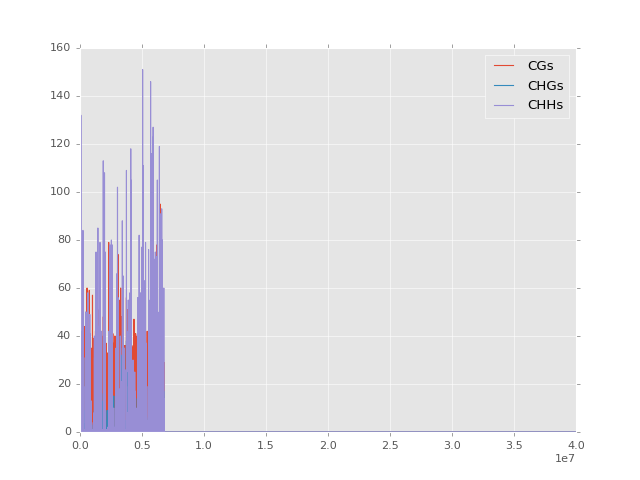

In [88]:
m.plotclass(CGs1,CHGs1,CHHs1,1,0,max_size,window)

#### Ploting the number of methylated cytosines for a specified window

In [89]:
##################### 
#You can either choose to keep the parameters specified before, or change them.
# To keep the same parameters, comment lines below
nbecotype2 = 60
min_size2 =0
max_size2 = 1000000
window2 = 1000
numchr2 = [1]
########################################


if numchr2 == 'all' :
    for i in range (1, nbchr+1):
        exec('plot%d =m.getplot(onlymethyl%d,nbecotype2,min_size2,max_size2,window2)' % (i,i))
else :
    for i in numchr2 :
        exec('plot%d =m.getplot(onlymethyl%d,nbecotype2,min_size2,max_size2,window2)' % (i,i))

<IPython.core.display.Javascript object>

## Converting the data onto sequence ##

If a site is methylated it will be a C and if not a A

In [92]:
for k in range (1,nbchr+1):
    print('Reading chromosome', k)
    exec('fasta_file= open("fastafile%d.txt", "w")' % (k))
    for j in range (nbecotype):
        seq_eco=[]
        exec('lenght=len(methylome_file%d[0])' % (k))
        for i in range (lenght):
            exec('meth=methylome_file%d[%d]["methylation_call"].iloc[%d]' % (k,j,i))
            if meth ==0:
                seq_eco.append('A')
            if meth ==1:
                seq_eco.append('C')
        seq=("".join(seq_eco))
        print('I read ecotype %d/%d : %s' %(j+1,nbecotype, names[j]))
        fasta_file.write(">")
        fasta_file.write(list_ecotype[j])
        fasta_file.write("\n")
        fasta_file.write(seq)
        fasta_file.write("\n")
        print('I wrote the fasta file for the ecotype %d/%d : %s' %(j+1,nbecotype, names[j]))
    fasta_file.close()


('Reading chromosome', 1)
I read ecotype 0/59 : Col_0
I wrote the fasta file for the ecotype 0/59 : Col_0
I read ecotype 1/59 : Fr_2
I wrote the fasta file for the ecotype 1/59 : Fr_2
I read ecotype 2/59 : Kro_0
I wrote the fasta file for the ecotype 2/59 : Kro_0
I read ecotype 3/59 : Bsch_0
I wrote the fasta file for the ecotype 3/59 : Bsch_0
I read ecotype 4/59 : En_D
I wrote the fasta file for the ecotype 4/59 : En_D
I read ecotype 5/59 : Kelsterbach_4
I wrote the fasta file for the ecotype 5/59 : Kelsterbach_4
I read ecotype 6/59 : Aa_0
I wrote the fasta file for the ecotype 6/59 : Aa_0
I read ecotype 7/59 : Abd_0
I wrote the fasta file for the ecotype 7/59 : Abd_0
I read ecotype 8/59 : Ag_0
I wrote the fasta file for the ecotype 8/59 : Ag_0
I read ecotype 9/59 : Ak_1
I wrote the fasta file for the ecotype 9/59 : Ak_1
I read ecotype 10/59 : Altai_5
I wrote the fasta file for the ecotype 10/59 : Altai_5
I read ecotype 11/59 : Amel_1
I wrote the fasta file for the ecotype 11/59 : Ame

In [59]:
print(len(methylome_file1[1]))

1000


### Calculating Tajima's D

In [60]:
# First : we need to have a table containing the positions
for n in range (1,nbchr+1):
    exec('new%d=[]'%(n))
    for i in range (nbecotype) :
        #exec('methylome_file%d[i]["index"]=methylome_file%d[i].chrom.astype(str).str.cat(methylome_file%d[i].strand.astype(str).str.cat(methylome_file%d[i].pos.astype(str)))' % (n,n,n,n))
        exec('methylome_file%d[i]["Index"]=methylome_file%d[i].pos' % (n,n))
        exec('methylome_file%d[i]=methylome_file%d[i].set_index(methylome_file%d[i]["Index"])' % (n,n,n))
        exec('new%d.append(pandas.DataFrame(methylome_file%d[i].methylation_call))' % (n,n))
        print"I processed ecotype ",i,'/',nbecotype-1, 'for chromosome', n
    exec('tajimas_d%d=pandas.DataFrame(new%d[0].methylation_call)'% (n,n))
    exec('tajimas_d%d=tajimas_d%d.rename(columns={"methylation_call":"0"})' % (n,n))
    exec('tajimas_d%d["pos"]=methylome_file%d[0]["Index"]'%(n,n))
    for i in range (1,nbecotype) :
        exec('tajimas_d%d["%d"]=new%d[i]'%(n,i,n))
        exec('tajimas_d%d=tajimas_d%d.dropna()'%(n,n))

I processed ecotype  0 / 151 for chromosome 1
I processed ecotype  1 / 151 for chromosome 1
I processed ecotype  2 / 151 for chromosome 1
I processed ecotype  3 / 151 for chromosome 1
I processed ecotype  4 / 151 for chromosome 1
I processed ecotype  5 / 151 for chromosome 1
I processed ecotype  6 / 151 for chromosome 1
I processed ecotype  7 / 151 for chromosome 1
I processed ecotype  8 / 151 for chromosome 1
I processed ecotype  9 / 151 for chromosome 1
I processed ecotype  10 / 151 for chromosome 1
I processed ecotype  11 / 151 for chromosome 1
I processed ecotype  12 / 151 for chromosome 1
I processed ecotype  13 / 151 for chromosome 1
I processed ecotype  14 / 151 for chromosome 1
I processed ecotype  15 / 151 for chromosome 1
I processed ecotype  16 / 151 for chromosome 1
I processed ecotype  17 / 151 for chromosome 1
I processed ecotype  18 / 151 for chromosome 1
I processed ecotype  19 / 151 for chromosome 1
I processed ecotype  20 / 151 for chromosome 1
I processed ecotype  21

In [ ]:
tajimas_d1[(tajimas_d1['pos'] >= 433031 )& (tajimas_d1['pos']<=433819)]

In [ ]:
pi = [] #meanwise pair difference : looking at each pair of sequence to see how many variation do we have 
theta_pi =[] # estimate of the mutation rate based on the nucleotide diversity
theta_s =[]  #estimate of the mutation rate based on the number of segregating sites 
s =[] # number of segregating sites : total number of sites that are different
#using only the methylable sites
tajimas=[] #new list
########################TAJIMA'S D PARAMETERS#######################
a1=sum(1./i for i in range (1,nbecotype))
a2=sum(1./i**2 for i in range (1,nbecotype))
n=nbecotype
b1=(n+1.)/(3*(n-1))
b2=(2*(n**2+n+3.))/(9*n*(n-1.))
c1=b1-(1/a1)
c2=b2 - ((n+2)/(a1*n))+(a2/a1**2)
e1=c1/a1
e2=c2/(a1**2 +a2)
####################################################################
import numpy as np
window_list=numpy.arange(min_size,max_size+window,window)
for n in range (1,nbchr+1):
    for i in range (1, int((max_size+window-min_size)/window)) :
        pi_int=[]
        exec('truc=tajimas_d%d[(tajimas_d%d.pos> window_list[i-1])&(tajimas_d%d.pos<= window_list[i])]'%(n,n,n))
        len1=len(truc)
        truc=truc.drop(truc.columns[1], axis=1) #droping the column with position number        
        for i in range (nbecotype) :
            for j in range (nbecotype) :
                if i < j :
                    exec('pi_int.append(sum(truc["%d"] != truc["%d"]))' % (i,j))
        sum_pi_int=numpy.mean(pi_int)
        pi.append(numpy.mean(pi_int))
        truc2=truc[truc.apply(pandas.Series.nunique, axis=1) == 1] #keeping only the row where all the columns have the same number
        len2=len(truc2)
        s_int=len1-len2
        s.append(s_int)
        tajimas.append((sum_pi_int - s_int/a1)/np.sqrt(e1*s_int +e2*s_int*(s_int-1)))

In [ ]:
#Ploting S values
s=pandas.DataFrame(s)
pi=pandas.DataFrame(pi)
tajimas=pandas.DataFrame(tajimas)
print(pi)
#s.plot()
#pi.plot()
#tajimas.plot()
print(np.mean(tajimas))

In [ ]:
s1 = "GAT-ACA"
s2 = "AT-GCGA"
s3 = "AAAAAAA"
list=[s1,s2,s3]
hi=[]
for i in list :
    for j in list :
        if i<j:
            hi.append(sum (a != b for (a,b) in zip(i,j)))
numpy.mean(hi)

# Code bit by bit

Importing the libraries we will use :

- os : allowing us to specify the path to file without having to worry about the / or \ depending on the operating system used
- pandas : usefull for easy data/table manipulation
- matplotlib : for plots, using the matplotlib notebook allow us to zoom in plots etc

In [ ]:
# Importing libraries
import os
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Definition of the parameters that will be used later on :

+ the number of chromosoms we want to look at
+ the number of rows we want to read if we don't want to read the entire file
+ the number of ecotypes we are studying
+ the size of the window we want to use for the analysis
+ the size of the longest chromosome
+ the file were are stored the names of the ecotypes
+ python version




In [ ]:
#Defining parameters
nbchr = 1 #numbre of chromosoms
nrows = 140000#number of rows to read
nbecotype=15 #number of ecotypes
window=1000 #size of the window in basepair
max_size= 400000 #size of the longest chromosome
list_ecotypes=os.path.join('ecotypes.txt') #list of the ecotypes that will be used. Put the ref FIRST
python = 2 #Specify the python version 2 or 3

Here we are creating an array with the list of the position of the begginning of each window.

In [ ]:
#Creating a list with the different windows
window_list=np.arange(0,max_size+window,window)

#### Run to read the entire files and separating the data by chromosomes

We are reading the ecotype files. First we transpose the list of ecotypes into an readable array. Then we are reading each entry of this array and reading the associated file to append it to methylome_files.
methylome_files[0] will be the file for the ecotype 0 and so on.

In [ ]:
#Reading the ecotype files
imp=open(list_ecotypes, 'r')
list_ecotype=[]
for line in imp:
    for i in line.split():
        list_ecotype.append(i)
methylome_files=[]
for i in range (nbecotype) :
    methylome_files.append(pd.read_csv(os.path.join(list_ecotype[i]), sep='\t'))
    if python == 2 :
        print 'I read ecotype', i , ':', list_ecotype[i]
    if python == 3 :
        print ('I read ecotype', i , ':', list_ecotype[i])

#### Run to read only a specified number of rows
Same thing as above but if we only want to read a certain number of rows in all the files

In [ ]:
#Reading the ecotype files
imp=open(list_ecotypes, 'r')
list_ecotype=[]
for line in imp:
    for i in line.split():
        list_ecotype.append(i)
methylome_files=[]
for i in range (nbecotype) :
    methylome_files.append(pd.read_csv(os.path.join(list_ecotype[i]), sep='\t',nrows=nrows))
    if python == 2 :
        print 'I read ecotype', i , ':', list_ecotype[i]
    if python == 3 :
        print ('I read ecotype', i , ':', list_ecotype[i])

### Distinguishing between the different methylation class
We are creating a new 

In [ ]:
#Keep only the rows where we have a methylation
#onlymethyl=[]
#for i in range (nbecotype) :
#    onlymethyl.append(pd.DataFrame(methylome_files[i][methylome_files[i].methylation_call==1]))

#Defining the different methylation class depending on the nucleotides
CHGs=[]
for i in range (nbecotype) :
    CHGs.append(onlymethyl[i][onlymethyl[i].mc_class=='CAG'].append(onlymethyl[i][onlymethyl[i].mc_class=='CCG']).append(onlymethyl[i][onlymethyl[i].mc_class=='CTG']))
CGs=[]
for i in range (nbecotype) :
    CGs.append(onlymethyl[i][onlymethyl[i].mc_class=='CGA'].append(onlymethyl[i][onlymethyl[i].mc_class=='CGT']).append(onlymethyl[i][onlymethyl[i].mc_class=='CGC']).append(onlymethyl[i][onlymethyl[i].mc_class=='CGG']))
CHHs=[]
for i in range (nbecotype) :
    CHHs.append(onlymethyl[i][onlymethyl[i].mc_class=='CAA'].append(onlymethyl[i][onlymethyl[i].mc_class=='CAT']).append(onlymethyl[i][onlymethyl[i].mc_class=='CAC']).append(onlymethyl[i][onlymethyl[i].mc_class=='CCA']).append(onlymethyl[i][onlymethyl[i].mc_class=='CCC']).append(onlymethyl[i][onlymethyl[i].mc_class=='CCT']).append(onlymethyl[i][onlymethyl[i].mc_class=='CTA']).append(onlymethyl[i][onlymethyl[i].mc_class=='CTC']).append(onlymethyl[i][onlymethyl[i].mc_class=='CTT']))

#npmyfile_ref=pd.DataFrame.as_matrix(myfile_ref)
#npmyfile_ref_onlymethyl=pd.DataFrame.as_matrix(myfile_ref_onlymethyl)
#npCGs_ref=pd.DataFrame.as_matrix(CGs_ref)
#npCHGs_ref=pd.DataFrame.as_matrix(CHGs_ref)
#npCHHs_ref=pd.DataFrame.as_matrix(CHHs_ref)


In [ ]:
index=np.arange(0,max_size-window,window)
columnss=np.arange(0,nbecotype)
nbofmethyl=pd.DataFrame(index=index, columns=columnss)
for n in range (0, nbecotype):
    line=[]
    for i in range (1, int((max_size)/window)) : 
        line.append(methylome_files[n]['methylation_call'][(methylome_files[n]['pos'] > window_list[i-1]) & (methylome_files[n]['pos'] <= window_list[i])].sum())
    nbofmethyl[n]=line


In [ ]:
nbofmethyl

In [ ]:
nbofmethyl.plot.line()
#fig1=plot1.get_figure()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#fig1.savefig('fig1.png')
#df=nbofmethyl.sum(axis=1)
#plot2=df.plot()
#fig2=plot2.get_figure()
#fig2.savefig('fig2.png')
#nbofmethyl.plot.bar(stacked=True)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# Some informations about the dataset
mycounts=[len(npmyfile_ref)]#,len(npmyfile1), len(npmyfile2), len(npmyfile3), len(npmyfile4), len(npmyfile5), len(npmyfile6)]
mycounts_methyl=[len(npmyfile_ref_onlymethyl)]#,len(npmyfile1_onlymethyl), len(npmyfile2_onlymethyl), len(npmyfile3_onlymethyl), len(npmyfile4_onlymethyl), len(npmyfile5_onlymethyl), len(npmyfile6_onlymethyl)]
prop_methyl=[mycounts_methyl[i]*100/mycounts[i] for i in range (0,nbecotype)]
#here I need decimals..
print (mycounts)
print (mycounts_methyl)
print("Percentage of cytosine that are methylated", prop_methyl) 


# Methods 
### Contained in the methyl.py module

In [ ]:
def prnt (statement, python) :
    "This function will print the statement depending on the python version"
    "statement should be the string you want to print or the data"
    "python should be the version used, 2 or 3"
    if python==2:
        print statement
    if python==3:
        print(statement)
    return

In [ ]:
import numpy as np
import pandas as pd
def getplot (onlymethyl,nbecotype,min_size,max_size,window) :
    window_list=np.arange(min_size,max_size+window,window)
    columnss=np.arange(0,nbecotype)
    nbofmethyl=pd.DataFrame(index=window_list[:-1], columns=columnss)
    for n in range (0, nbecotype):
        line=[]
        for i in range (1, int((max_size+window-min_size)/window)) : 
            line.append(onlymethyl[n].methylation_call[(onlymethyl[n].pos > window_list[i-1]) & (onlymethyl[n].pos <= window_list[i])].sum())
        nbofmethyl[n]=line
    nbofmethyl.plot()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
def getplotclass (CGs,CHGs,CHHs,min_size,max_size,window) :
    window_list=np.arange(min_size,max_size+window,window)
    columnss=['CGs','CHGs','CHHs']
    nbofmethylclass=pd.DataFrame(index=window_list[:-1], columns=columnss)
    for c in columnss:
        line=[]
        for i in range (1, int((max_size+window-min_size)/window)) : 
        line.append(c[n].methylation_call[(c[n].pos > window_list[i-1]) & (c[n].pos <= window_list[i])].sum())
    nbofmethylclass[c]=line
    nbofmethylclass.plot()

### Unfinished

In [ ]:
####TO BE CONTINUED
class methylome(object) :
    def __init__(self,x):
        self.read(x)
    def read(self,x) :
        ""
        imp=open(list_ecotypes, 'r')
        list_ecotype=[]
        for line in imp:
            for i in line.split():
                list_ecotype.append(i)
        for i in range (1, nbchr+1):
            exec('self.methylome_file%d = []' % (i))
            exec('self.onlymethyl%d = []' % (i))
        self.onlymethyl=[]
        if nrows == 'all' :
            statement ='No number of rows specified, reading all the file'
            prnt(statement, python)
            for i in range (nbecotype) :    
                methylome_files=(pd.read_csv(os.path.join(list_ecotype[i]), sep='\t'))
                if numchr == 'all' :
                    for x in range (1,nbchr+1):
                        exec('self.onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (x,x))
                        exec('self.methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (x,x))
                else :
                    for c in numchr :
                        exec('self.onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (c,c))
                statement='I read ecotype %d/%d : %s' %(i,nbecotype-1, list_ecotype[i])
                prnt(statement,python)
        else :
            statement='Only the first %d rows will be read' % (nrows)
            prnt(statement, python)
            for i in range (nbecotype) :
                methylome_files=(pd.read_csv(os.path.join(list_ecotype[i]), sep='\t', nrows=nrows))
                if numchr == 'all' :
                    for x in range (1,nbchr+1):
                        exec('self.onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (x,x))
                        exec('self.methylome_file%d.append(methylome_files[methylome_files.chrom == %d])'% (x,x))
                else :
                    for c in numchr :
                        exec('self.onlymethyl%d.append(methylome_files[(methylome_files.methylation_call==1) & (methylome_files.chrom == %d)])' % (c,c))
                
                stat='I read ecotype %d/%d : %s' %(i,nbecotype-1, list_ecotype[i])
                prnt(stat,python)    
        methylome_files=None
        print x